# **STAGE 2**

> **Cleaned Dataset and EDA Report**



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

* Read the dataset
* Show the columns and rows


In [34]:
df = pd.read_csv("../data/breast_cancer_data.csv")
df.shape

(569, 33)

In [35]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* Show the duplicated and missing values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.drop(columns=["id", "Unnamed: 32"], inplace = True)

In [40]:
df["diagnosis"]= df["diagnosis"].map({"M": 1, "B": 0})

In [41]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


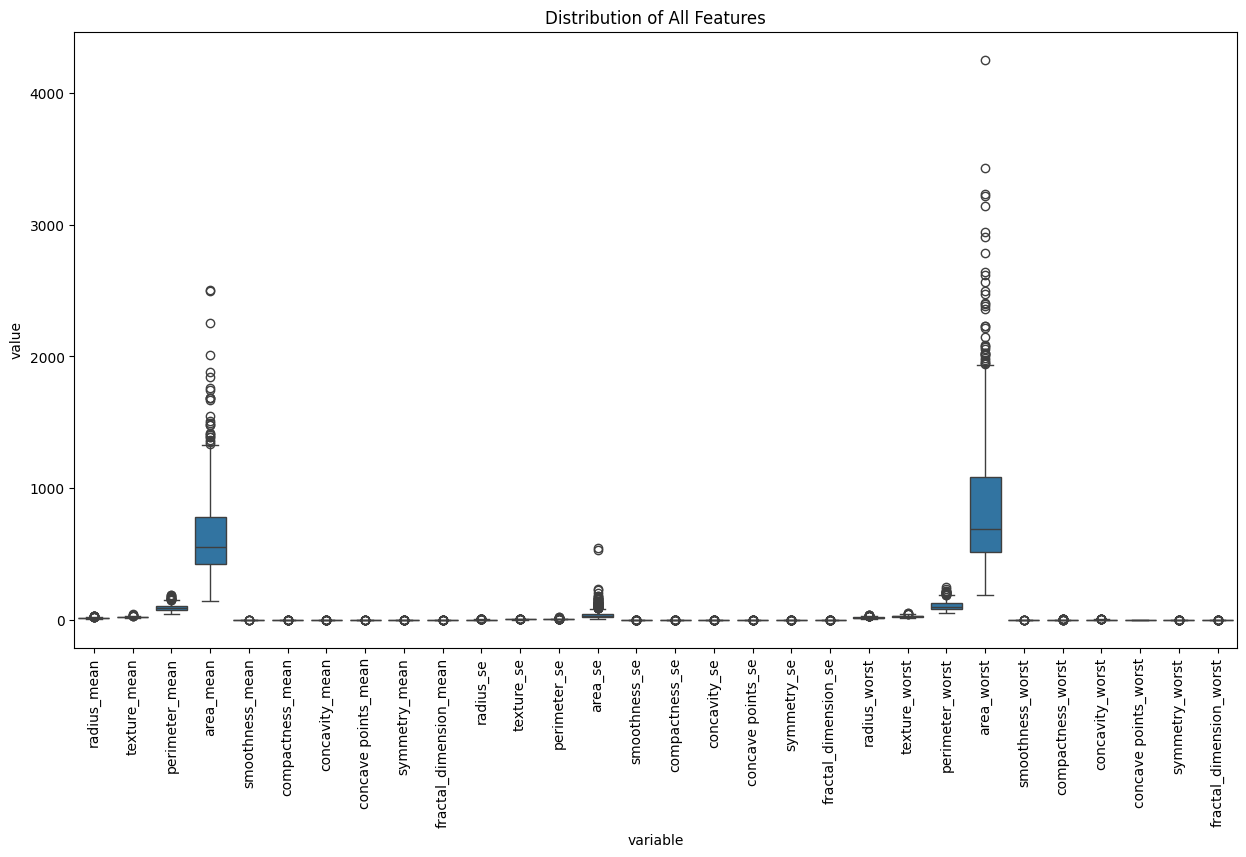

In [42]:
df_melted = df.melt(value_vars=df.columns[1:])

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_melted, x='variable', y='value')

plt.xticks(rotation=90)
plt.title('Distribution of All Features')
plt.show()

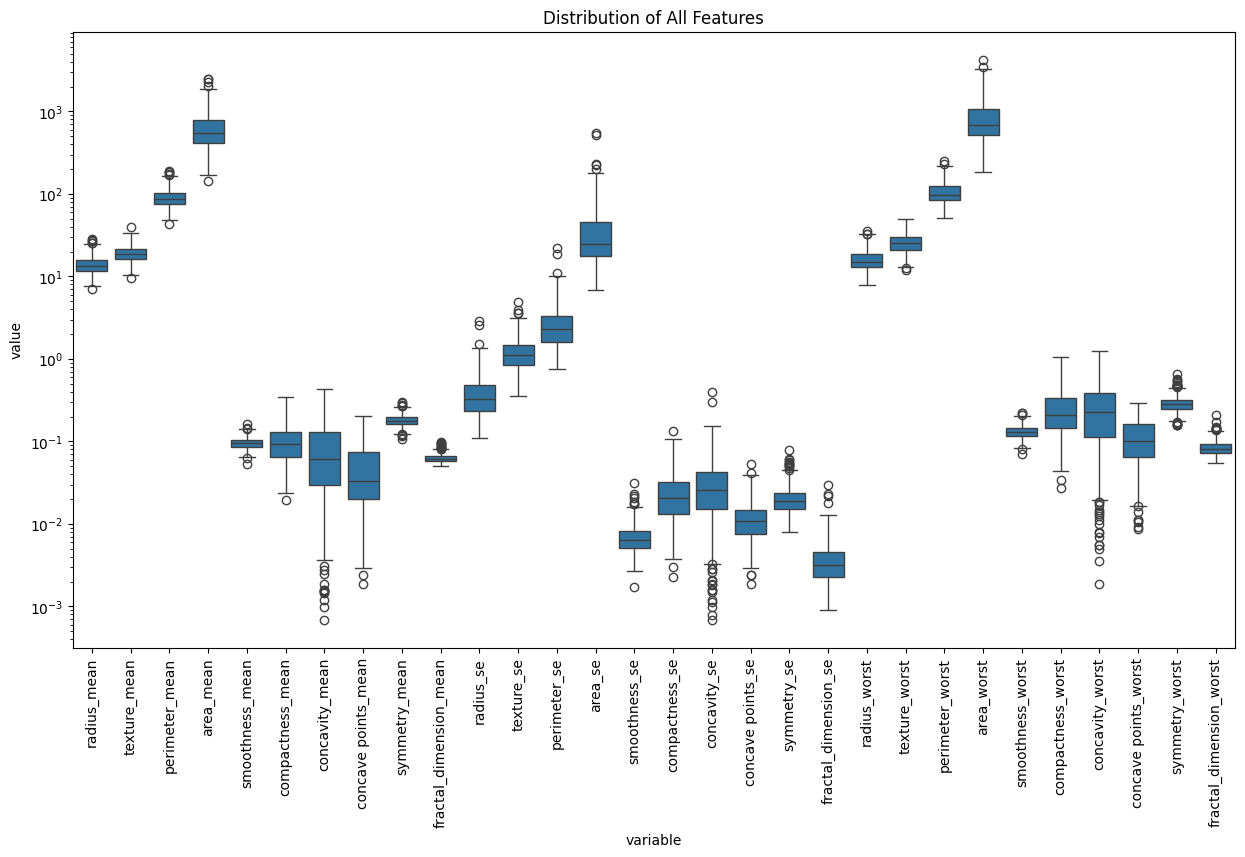

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_melted, x='variable', y='value', log_scale=True)

plt.xticks(rotation=90)
plt.title('Distribution of All Features')
plt.show()

In [44]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [45]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


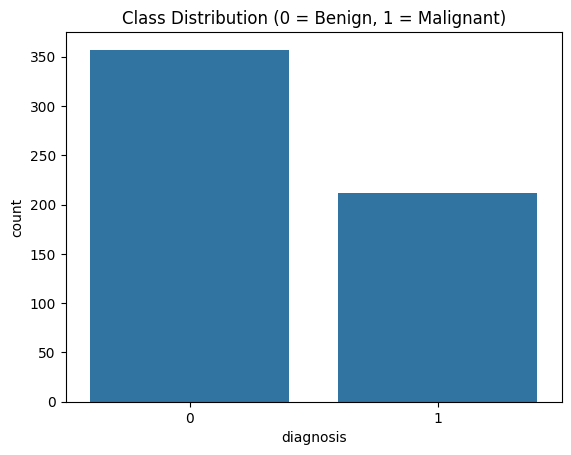

In [ ]:
sns.countplot(x="diagnosis", data=df)
plt.title('Class Distribution (0 = Benign, 1 = Malignant)')
plt.show()

In [ ]:
df['diagnosis'].value_counts(normalize=True) * 100

,proportion
diagnosis,
0,62.741652
1,37.258348


Top features: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']


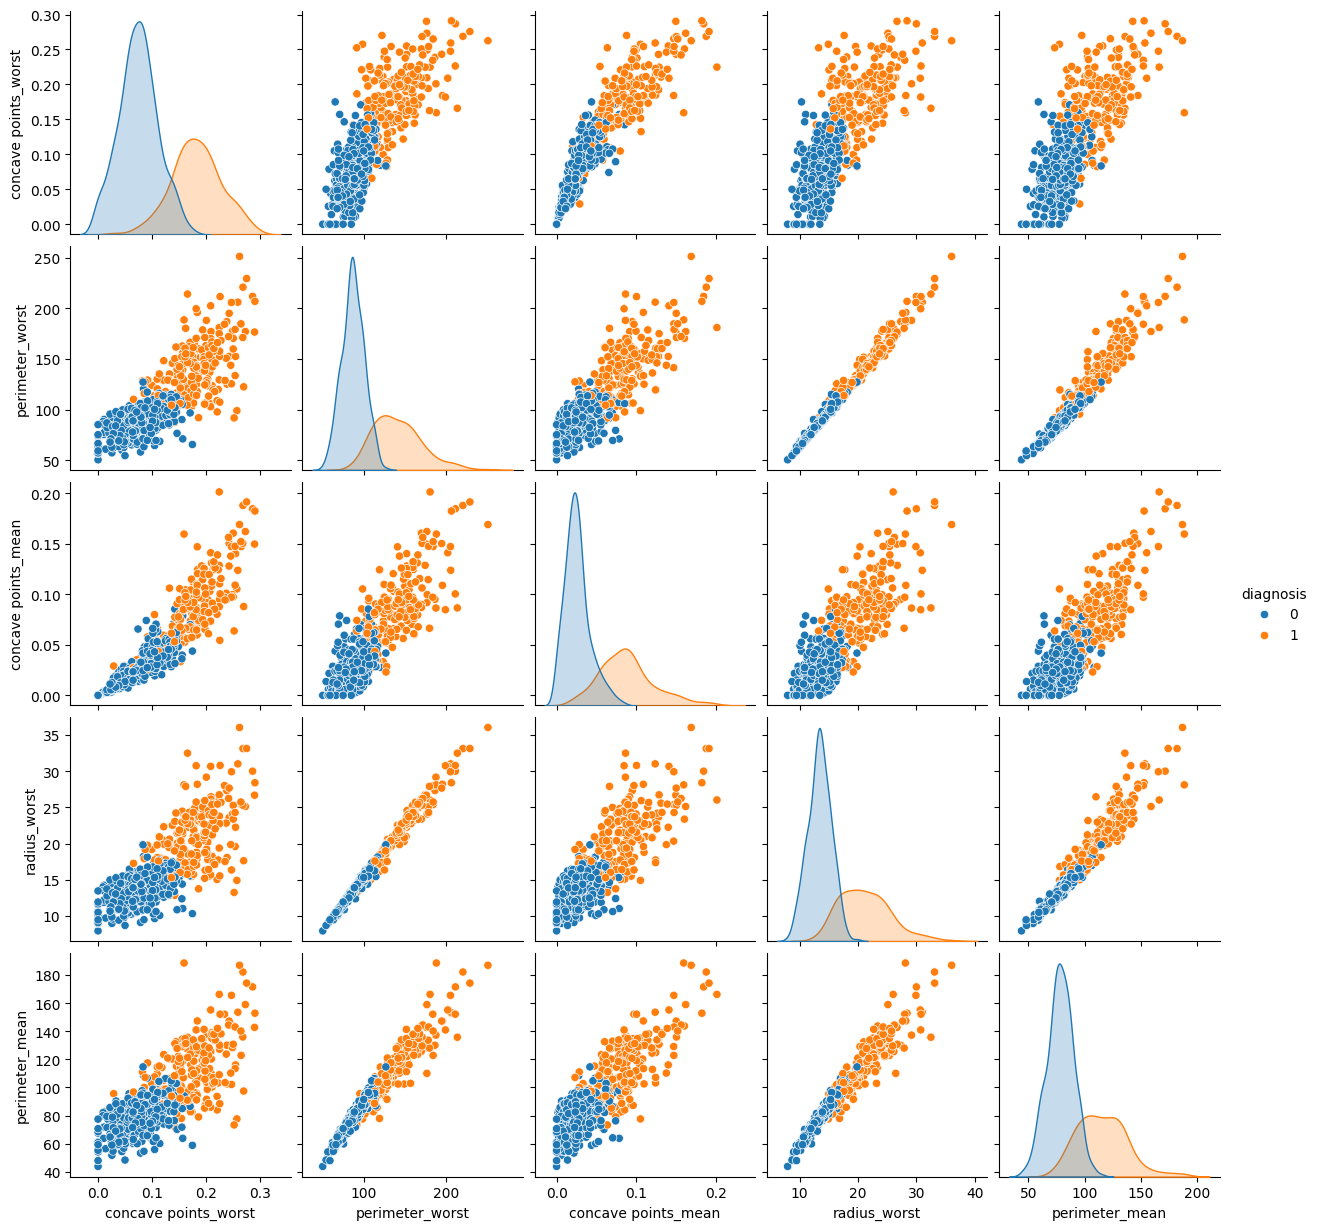

In [ ]:
corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)

# Select top 5 predictive features (besides target)
top_features = corr.index[1:6].tolist()
print("Top features:", top_features)

# Add target back to dataframe
pair_df = df[top_features + ['diagnosis']]

# Pairplot
sns.pairplot(pair_df, hue='diagnosis', diag_kind='kde')
plt.show()

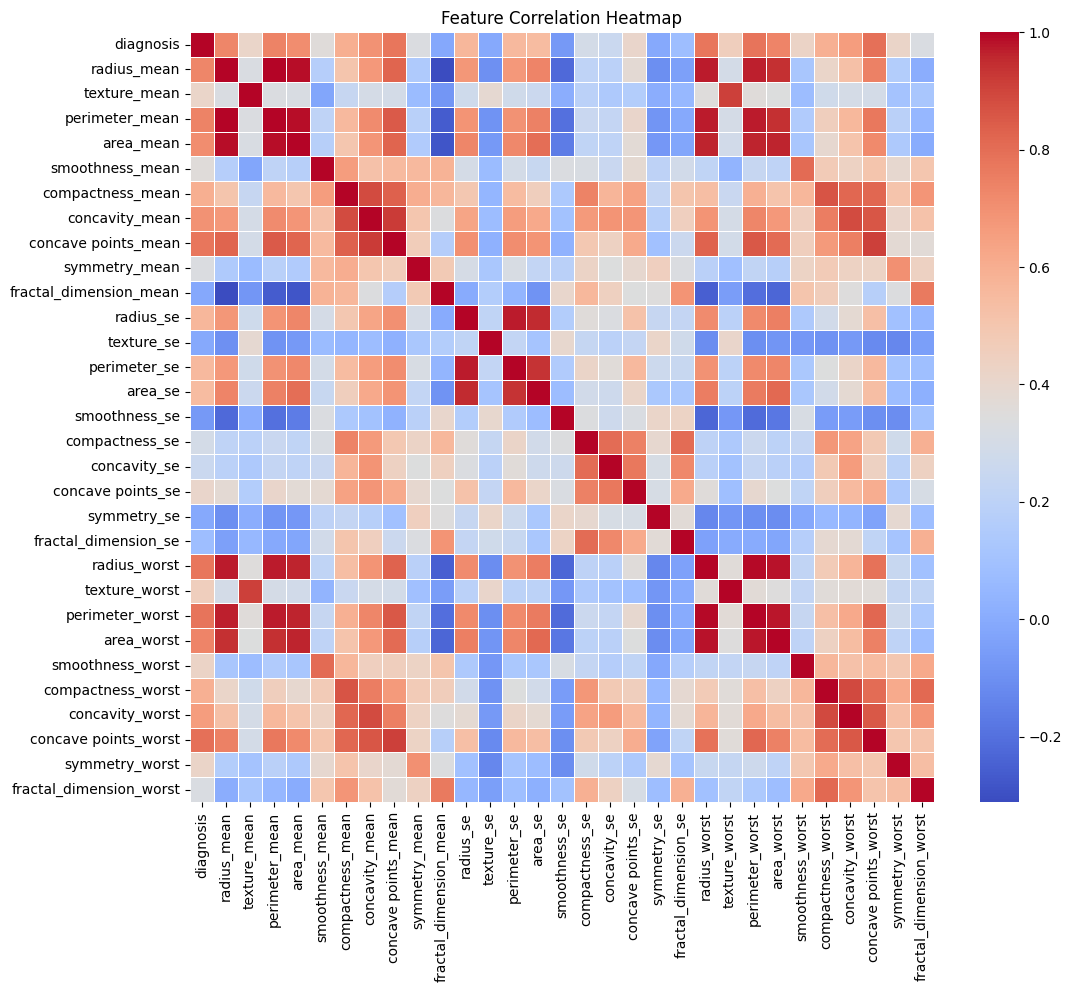

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.6)
plt.title('Feature Correlation Heatmap')
plt.show()

<Figure size 1000x700 with 0 Axes>

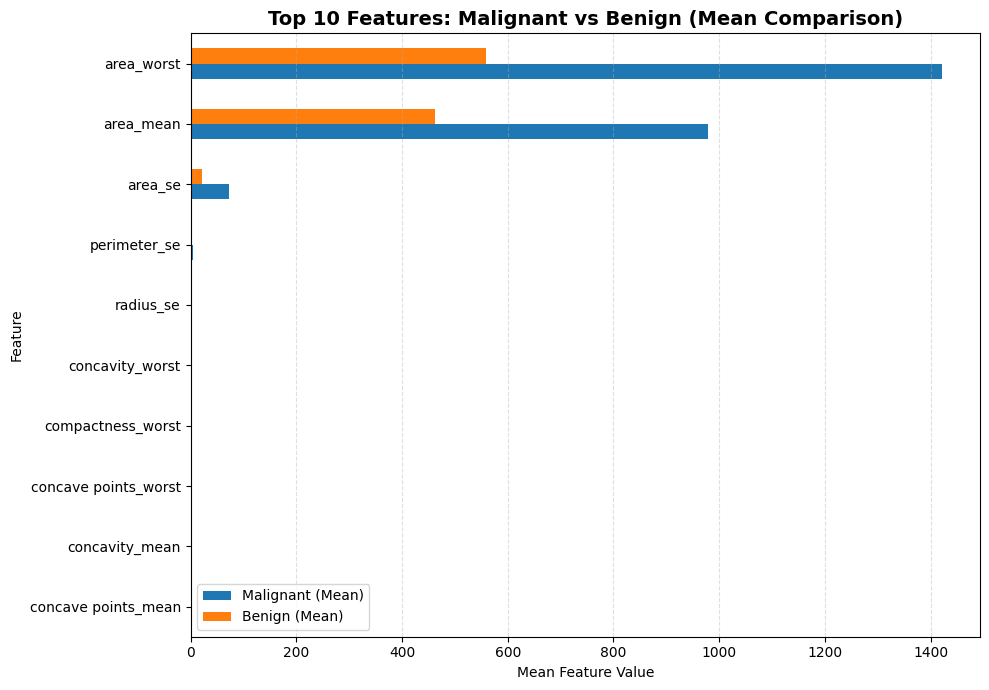

In [ ]:
feature_cols = df.drop(columns=['diagnosis']).columns

# Compute class-wise means
df_m = df[df['diagnosis'] == 1][feature_cols].mean()
df_b = df[df['diagnosis'] == 0][feature_cols].mean()

# Compute malignant/benign ratio → pick top 10 strongest features
top_features = (df_m / df_b).nlargest(10).index

# Build comparison dataframe
comparison_data = pd.DataFrame({
    'Malignant (Mean)': df_m[top_features],
    'Benign (Mean)': df_b[top_features]
})

# Create a single combined bar chart
plt.figure(figsize=(10, 7))
comparison_data.sort_values(by='Malignant (Mean)', ascending=True).plot(
    kind='barh',
    figsize=(10, 7)
)

plt.title('Top 10 Features: Malignant vs Benign (Mean Comparison)', fontsize=14, fontweight='bold')
plt.xlabel('Mean Feature Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

#     **STAGE 3**
>**Model Implementation**

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=99, stratify= y)
#stratified for balanced split

In [48]:
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Training class distribution: [285 170]
Test class distribution: [72 42]


In [49]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
y_pred_log_reg = log_reg_classifier.predict(X_test)
print(np.concatenate((y_pred_log_reg.reshape(len(y_pred_log_reg), 1), y_test.to_numpy().reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 3, metric="euclidean")
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [52]:
y_pred_knn = knn_model.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.to_numpy().reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [53]:
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, random_state=50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [54]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nFeature Importances:\n", importances.sort_values(ascending=False))


Feature Importances:
 concave points_worst       0.150493
perimeter_worst            0.145539
radius_worst               0.133092
area_worst                 0.128954
concave points_mean        0.093844
radius_mean                0.039234
area_mean                  0.034180
concavity_mean             0.033189
perimeter_mean             0.031324
area_se                    0.030680
concavity_worst            0.024094
texture_mean               0.021698
compactness_worst          0.014961
texture_worst              0.014283
perimeter_se               0.011712
radius_se                  0.010474
smoothness_worst           0.009897
symmetry_worst             0.009619
compactness_mean           0.008426
fractal_dimension_worst    0.007572
concave points_se          0.006187
concavity_se               0.005197
fractal_dimension_se       0.004846
smoothness_mean            0.004801
symmetry_se                0.004695
texture_se                 0.004542
fractal_dimension_mean     0.004295
symme

In [55]:
svm_model = SVC(kernel="rbf", gamma="scale", random_state=9)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [56]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [57]:
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbours": KNeighborsClassifier(n_neighbors = 3, metric="euclidean"),
          "Random Forest": RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, random_state=50),
          "Support Vector Machine": SVC(kernel="rbf", gamma="scale", random_state=9),
          "Gradient Boosting": GradientBoostingClassifier()}

In [58]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=9)
X_train_np = X_train if isinstance(X_train, np.ndarray) else X_train.values
y_train_np = y_train if isinstance(y_train, np.ndarray) else y_train.values

training_results = []

for name, model in models.items():
  acc_scores, pre_scores, rec_scores, f1_scores, auc_scores = [], [], [], [], []

  for train_idx, val_idx in cv.split(X_train_np, y_train_np):
    X_tr, X_val = X_train_np[train_idx], X_train_np[val_idx]
    y_tr, y_val = y_train_np[train_idx], y_train_np[val_idx]
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    if hasattr(model, "predict_proba"):
      y_prob = model.predict_proba(X_val)[:, 1]
      auc = roc_auc_score(y_val, y_prob)
    else:
      auc = np.nan

    acc_scores.append(accuracy_score(y_val, y_pred))
    pre_scores.append(precision_score(y_val, y_pred, average="weighted"))
    rec_scores.append(recall_score(y_val, y_pred, average="weighted"))
    f1_scores.append(f1_score(y_val, y_pred, average="weighted"))
    auc_scores.append(auc)

  training_results.append({
      "Model": name,
      "Accuracy (Mean ± SD)": f"{np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}",
      "Precision": np.mean(pre_scores),
      "Recall": np.mean(rec_scores),
      "F1 Score": np.mean(f1_scores),
      "AUC": np.mean(auc_scores)
  })
training_df = pd.DataFrame(training_results)
print(training_df)

                    Model Accuracy (Mean ± SD)  Precision    Recall  F1 Score  \
0     Logistic Regression      0.9824 ± 0.0112   0.982763  0.982418  0.982333   
1    K-Nearest Neighbours      0.9560 ± 0.0139   0.956240  0.956044  0.955843   
2           Random Forest      0.9604 ± 0.0149   0.960630  0.960440  0.960284   
3  Support Vector Machine      0.9670 ± 0.0120   0.967352  0.967033  0.966911   
4       Gradient Boosting      0.9363 ± 0.0298   0.936872  0.936264  0.935945   

        AUC  
0  0.991434  
1  0.982559  
2  0.992879  
3       NaN  
4  0.989680  


In [59]:
testing_results = []

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
  else:
    auc= np.nan

  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred, average="weighted")
  rec = recall_score(y_test, y_pred, average="weighted")
  f1 = f1_score(y_test, y_pred, average="weighted")

  testing_results.append({
      "Model": name,
      "Accuracy": acc,
      "Precision": pre,
      "Recall": rec,
      "F1 Score": f1,
      "AUC": auc
  })
testing_df = pd.DataFrame(testing_results)
print(testing_df)

                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0     Logistic Regression  0.964912   0.965858  0.964912  0.965073  0.995701
1    K-Nearest Neighbours  0.982456   0.982930  0.982456  0.982362  0.975529
2           Random Forest  0.956140   0.956505  0.956140  0.956245  0.985946
3  Support Vector Machine  0.973684   0.973969  0.973684  0.973747       NaN
4       Gradient Boosting  0.956140   0.956073  0.956140  0.956027  0.988426


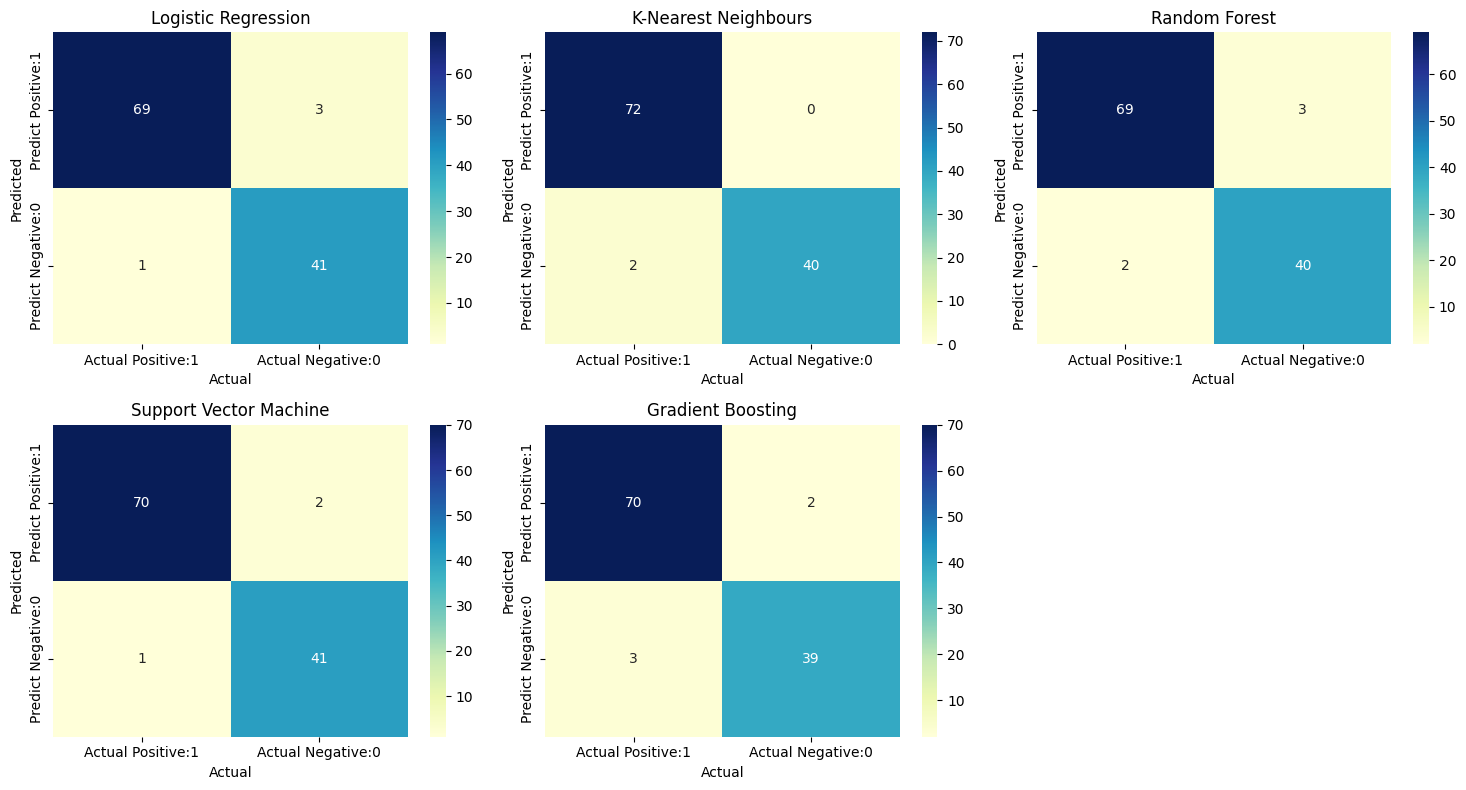

In [60]:
predicted = {"Logistic Regression": y_pred_log_reg,
          "K-Nearest Neighbours": y_pred_knn,
          "Random Forest": y_pred_rf,
          "Support Vector Machine": y_pred_svm,
          "Gradient Boosting": y_pred_gb}

fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

i = 0
for prediction in predicted:
  cm = confusion_matrix(y_test, predicted[prediction])
  cm_matrix = pd.DataFrame(data=cm, columns= ["Actual Positive:1", "Actual Negative:0"], index=["Predict Positive:1", "Predict Negative:0"])
  sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="YlGnBu", ax=axes[i])
  axes[i].set_title(prediction)
  axes[i].set_xlabel("Actual")
  axes[i].set_ylabel("Predicted")
  i += 1

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [61]:
for prediction in predicted:
  acc = accuracy_score(y_test, predicted[prediction])
  print(f"Accuracy of {prediction} model:\t {acc * 100:.2f}%")
  cr = classification_report(y_test, predicted[prediction])
  print(f"\nClassification Report:\n {cr}")

Accuracy of Logistic Regression model:	 96.49%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Accuracy of K-Nearest Neighbours model:	 98.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy of Random Forest model:	 95.61%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93   

#     **STAGE 4**
>**Hyperparameter Tuning**

In [62]:
from sklearn.ensemble import StackingClassifier
base_models = [("rf", RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, random_state=50)),
               ("svm", SVC(kernel="linear", gamma="scale", random_state=9))]

In [63]:
#Ensemble models
ensemble_models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, random_state=50),
    "Stacking": StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
}
results = []
for name, model in ensemble_models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred, average="weighted")
  rec = recall_score(y_test, y_pred, average="weighted")
  f1 = f1_score(y_test, y_pred, average="weighted")

  results.append({
      "Model": name,
      "Accuracy": acc,
      "Precision": pre,
      "Recall": rec,
      "F1 Score": f1
  })
results_df = pd.DataFrame(results)
print(results_df)

               Model  Accuracy  Precision    Recall  F1 Score
0  Gradient Boosting  0.956140   0.956073  0.956140  0.956027
1      Random Forest  0.956140   0.956505  0.956140  0.956245
2           Stacking  0.973684   0.973969  0.973684  0.973747


In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
models_randomized = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Stacking": StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
}

In [66]:
param_randomized = {
    "Gradient Boosting": {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 1.0]
    },
    "Random Forest": {
        "n_estimators": [100, 300],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2],
        "class_weight": ["balanced", None]
    },
    "Stacking": {
        "final_estimator__C": [0.1, 1, 10],
        "final_estimator__solver":["lbfgs", "liblinear"],
        "rf__n_estimators": [100, 200],
        "rf__max_depth": [None, 5, 10],
        "svm__C": [0.1, 1, 10],
        "svm__kernel": ["linear", "rbf"]
    }
}

In [67]:
#this block of code was executed several times. Best result out of them selected.
best_models = {}
results = []

for name, model in models_randomized.items():
  print(f"Running RandomizedSearch for {name}...")
  random_search = RandomizedSearchCV(model, param_randomized[name], cv=5, n_jobs=-1, scoring="f1", n_iter=100, random_state=49)
  random_search.fit(X_train, y_train)

  best_models[name] = random_search.best_estimator_
  y_pred_randomized = random_search.predict(X_test)
  f1_randomized = f1_score(y_test, y_pred_randomized)
  results.append({
      "Model": name,
      "Best Parameters": random_search.best_params_,
      "F1 score": f1_randomized
  })

results_df = pd.DataFrame(results)
print(results_df)

Running RandomizedSearch for Gradient Boosting...


c:\Users\mahmu\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Running RandomizedSearch for Random Forest...
Running RandomizedSearch for Stacking...
               Model  \
0  Gradient Boosting   
1      Random Forest   
2           Stacking   

                                                                                                                                   Best Parameters  \
0                                                                    {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}   
1      {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced'}   
2  {'svm__kernel': 'rbf', 'svm__C': 10, 'rf__n_estimators': 200, 'rf__max_depth': 10, 'final_estimator__solver': 'lbfgs', 'final_estimator__C': 1}   

   F1 score  
0  0.963855  
1  0.952381  
2  0.951220  


In [72]:
base_random = [("rf", RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=10, random_state=50)),
               ("svm", SVC(kernel="linear", C=10, gamma="scale", random_state=9))]
new_ensemble_models = {
    "Gradient Boosting": GradientBoostingClassifier(subsample=0.8, n_estimators=200, max_depth=4, learning_rate=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight= 'balanced', criterion='entropy', max_depth=None, min_samples_leaf= 2, min_samples_split= 5),
    "Stacking": StackingClassifier(estimators=base_random, final_estimator=LogisticRegression(C=1, solver="lbfgs"))
}

In [73]:
results_randomized = []
for name, model in new_ensemble_models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred, average="weighted")
  rec = recall_score(y_test, y_pred, average="weighted")
  f1 = f1_score(y_test, y_pred, average="weighted")

  results_randomized.append({
      "Model": name,
      "Accuracy": acc,
      "Precision": pre,
      "Recall": rec,
      "F1 Score": f1
  })
results_df = pd.DataFrame(results_randomized)
print(results_df)

               Model  Accuracy  Precision    Recall  F1 Score
0  Gradient Boosting  0.973684   0.973711  0.973684  0.973616
1      Random Forest  0.956140   0.956505  0.956140  0.956245
2           Stacking  0.973684   0.973711  0.973684  0.973616


In [74]:
def plot_feature_importance(model, feature_names, title):
  importances = model.feature_importances_
  fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)

  plt.figure(figsize=(8, 5))
  plt.bar(fi.index, fi.values)
  plt.xticks(rotation=90)
  plt.title(title)
  plt.ylabel("Importance")
  plt.tight_layout()
  plt.show()

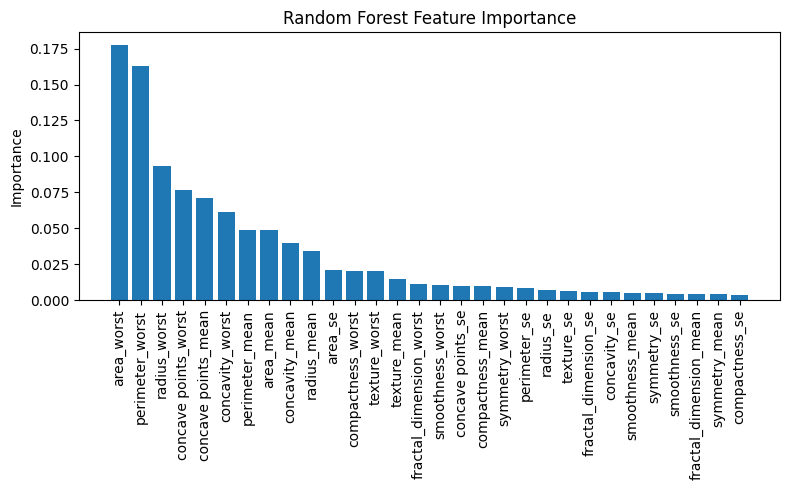

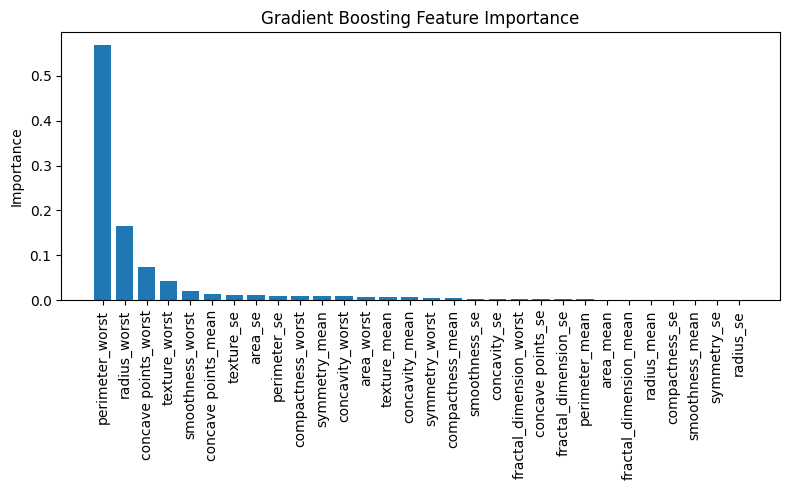

In [75]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
plot_feature_importance(new_ensemble_models["Random Forest"], X_scaled_df.columns, "Random Forest Feature Importance")
plot_feature_importance(new_ensemble_models["Gradient Boosting"], X_scaled_df.columns, "Gradient Boosting Feature Importance")